In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Check for nulls
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Rename columns
df.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Convert cat column Gender to numerical using get dummies
df = pd.get_dummies(df, columns=["Gender"], dtype=int, drop_first=True)
df.head()

,CustomerID,Age,Annual Income,Spending Score,Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


<Axes: xlabel='Age', ylabel='Annual Income'>

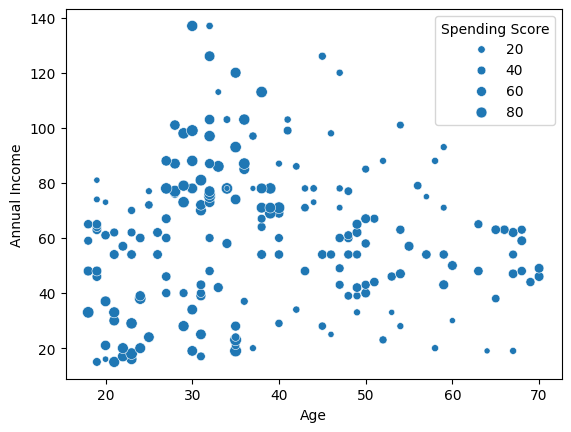

In [7]:
sns.scatterplot(data=df, x='Age', y='Annual Income', size='Spending Score')

In [8]:
#Drop unwanted column
df = df.drop('CustomerID', axis=1)
df.head()

,Age,Annual Income,Spending Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
#Scaling our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Annual Income'] = scaler.fit_transform(df[['Annual Income']])
df['Spending Score'] = scaler.fit_transform(df[['Spending Score']])

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
wcss = []  # Within Cluster Sum of Squares
silhouette_scores = []

for k in range(2, 11):  # test k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

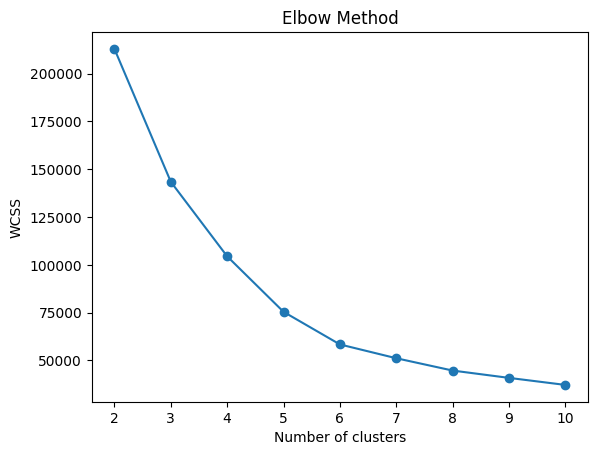

In [14]:
# Plot Elbow Method
plt.plot(range(2, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

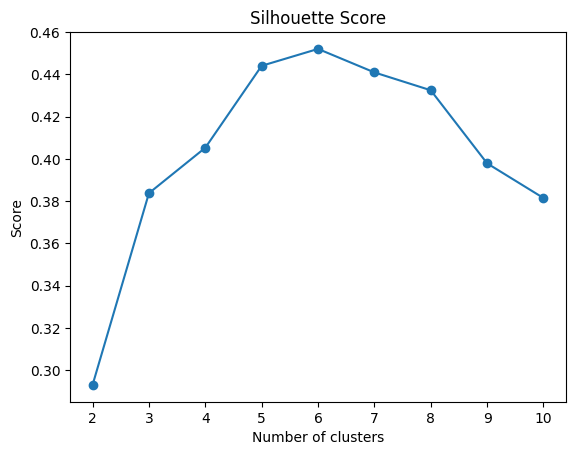

In [15]:
# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker="o")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.show()

In [24]:
#Choose best K (e.g., from Elbow/Silhouette, let’s say 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)

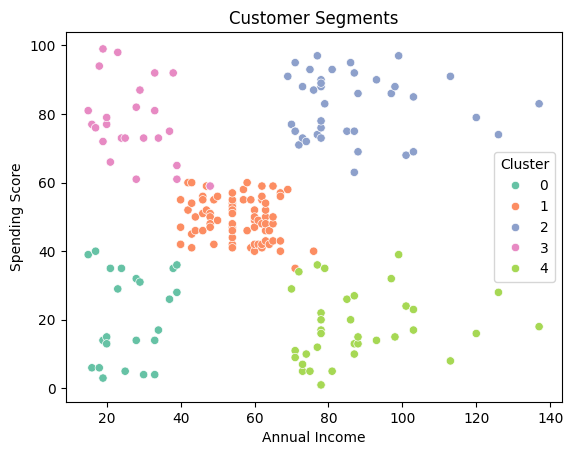

In [26]:
#Understand the clusters (Profile them)
cluster_profile = df.groupby(df["Cluster"]).mean()
print(cluster_profile)

               Age  Annual Income  Spending Score  Gender_Male
Cluster                                                       
0        45.217391      26.304348       20.913043     0.391304
1        43.727273      55.480519       49.324675     0.402597
2        32.692308      86.538462       82.128205     0.461538
3        24.960000      28.040000       77.000000     0.440000
4        40.666667      87.750000       17.583333     0.527778


- Middle-aged budget spenders
- Middle-aged mid-income mid-spenders
- Young high income high spenders
- Young low income high spenders
- Middle-aged high income low spenders